# Install all required libraries


In [ ]:
! sudo apt-get install libportaudio2     
#Portable Real-Time Audio Library. PortAudio is a portable audio I/O library designed for cross-platform support of audio        

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-525
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 65.4 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libportaudio2 amd64 19.6.0-1build1 [65.4 kB]
Fetched 65.4 kB in 1s (103 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Tele

In [ ]:
!pip install sounddevice
#This Python module provides bindings for the PortAudio library and a few convenience functions to play and record NumPy arrays containing audio signals.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install crypto
#It is a library that may be used in some cases to achieve security goals

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 KB 12.0 MB/s eta 0:00:00


In [ ]:
!pip install pycrypto
#A collection of cryptographic modules implementing various algorithms and protocols(AES,RSA,etc)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.2/446.2 KB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycrypto: filename=pycrypto-2.6.1-cp39-cp39-linux_x86_64.whl size=499021 sha256=fbdb9cbaa1eb3d1c3b354bdbecb92cbdd1d8a98a433ff36b88bf8730242170e3
  Stored in directory: /root/.cache/pip/wheels/9d/29/32/8b8f22481bec8b0fbe7087927336ec167faff2ed9db849448f
Successfully built pycrypto


In [ ]:
from scipy.io import wavfile 
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import random
import string
from Crypto.Cipher import AES
import time


#wav file -- A lightweight package to read/write wave audio files to/from lists of native Python types.
#time -- used to calculate time taken

<ipython-input-7-4cec6bfec00c>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs,data = wavfile.read('/content/8bitaudio.wav')         #reading the wav file


[[128 128]
 [128 128]
 [128 128]
 ...
 [128 128]
 [128 128]
 [128 128]]


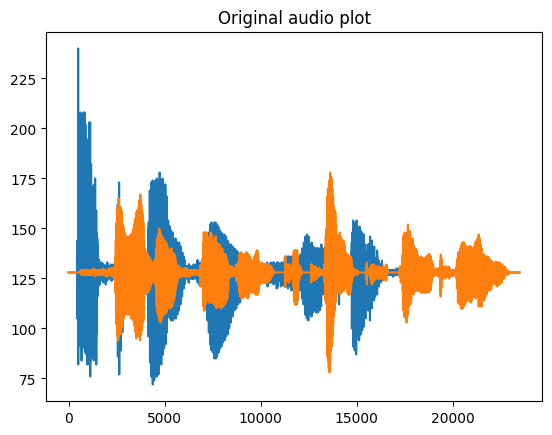

In [ ]:
fs,data = wavfile.read('/content/8bitaudio.wav')                                #reading the wav file
plt.plot(data)                                                                  #ploting the file based on the records in the wav file
plt.title("Original audio plot")
print(data)

**ENCRYPTION**

In [ ]:
with open('/content/8bitaudio.wav', 'rb') as fd:                                #opening the wav file
    contents = fd.read()                                                        #reading the wav file

In [ ]:
t1=time.time()                                                                  #initialising the time variable

In [ ]:
AES_KEY = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(16))   
#getting a random values for AES_key of resp. size(128,192,256)

AES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(16))
#getting a random values for AES_IV 
#IV -- starting variable is an input to a cryptographic primitive being used to provide the initial state.

In [ ]:
#printing the key and IV

print("AES Key is ", AES_KEY)
print("AES Initialization vector is ", AES_IV)

AES Key is  C6UO6f9KfODlyDkY
AES Initialization vector is  LUppBB8lNWssQQ3s


In [ ]:
# The AES cipher is created with CBC Mode wherein each block is “chained” to the previous block in the stream
# Also, for AES encryption using pycrypto, you need to ensure that the data is a multiple of 16-bytes in length.
# Pad the buffer if it is not and include the size of the data at the beginning of the output, so the receiver can decrypt properly.

encryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV.encode("utf-8"))
encrypted_audio = encryptor.encrypt(contents)

In [ ]:
# Save the encrypted audio file

with open('/content/encrypted_audio_file.wav', 'wb') as fd:
    fd.write(encrypted_audio)
print("A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated")

A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated


In [ ]:
# calculating the time taken and printing

t2=time.time()
print('Time taken for encryption - ',(t2-t1)*1000,'ms')
time.sleep(10)

Time taken for encryption -  53.47251892089844 ms


**DECRYPTION**

In [ ]:
with open('/content/encrypted_audio_file.wav', 'rb') as fd:                     #opening the wav file
    contents = fd.read()                                                        #reading the wav file

In [ ]:
# time calculation

t3=time.time()

In [ ]:
# again doing aes to the encrypted file

decryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV.encode("utf-8"))
decrypted_audio = decryptor.decrypt(contents)

In [ ]:
# Save the decrypted audio file

with open('/content/decrypted_audio_file.wav', 'wb') as fd:
    fd.write(decrypted_audio)

In [ ]:
# calculating the time taken and printing

t4=time.time()
print('Time taken for decryption - ',(t4-t3)*1000,'ms')

Time taken for decryption -  44.09956932067871 ms


<ipython-input-20-a1cec439ab97>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read('/content/decrypted_audio_file.wav')


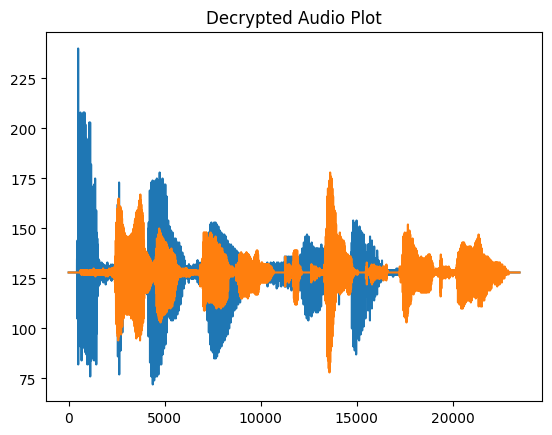

In [ ]:
#ploting the decrypted audio file which will be equal to original

fs, data = wavfile.read('/content/decrypted_audio_file.wav')
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Decrypted Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)